# 4차 프로그래밍 과제
* C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv

## (1) II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 Pipeline 기반 다중 회귀 모델링을 프로그래밍 하시오. 
* 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 하이퍼 파라미터 튜닝, 훈련 데이터 앙상블 학습 과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 전체 과정을 포함하시오. 

Model: Linear Regression
Train MSE: 3117.658905430178
Train MAE: 35.12200634651686
Train R^2: 0.8378284557995717
Test MSE: 5633.068155793253
Test MAE: 48.068801347004765
Test R^2: 0.8893455830696775

Model: Random Forest
Train MSE: 861.9734397831195
Train MAE: 11.550417236954662
Train R^2: 0.9551626499146816
Test MSE: 6511.86882037724
Test MAE: 34.01749149659864
Test R^2: 0.8720826683581783

Model: Gradient Boosting
Train MSE: 206.13991568998594
Train MAE: 9.495366089990394
Train R^2: 0.9892772014313161
Test MSE: 7159.751255440656
Test MAE: 38.71268098173043
Test R^2: 0.8593558468270719

Model: Linear Regression
Cross-validation R^2 scores: [ 0.83594822 -0.09964463  0.86840964  0.84135651  0.63509917]
Mean Cross-validation R^2 score: 0.6162337806164521

Model: Random Forest
Cross-validation R^2 scores: [0.81496331 0.54685073 0.90643016 0.87946363 0.54484589]
Mean Cross-validation R^2 score: 0.7385107427739164

Model: Gradient Boosting
Cross-validation R^2 scores: [0.93209447 0.50742865

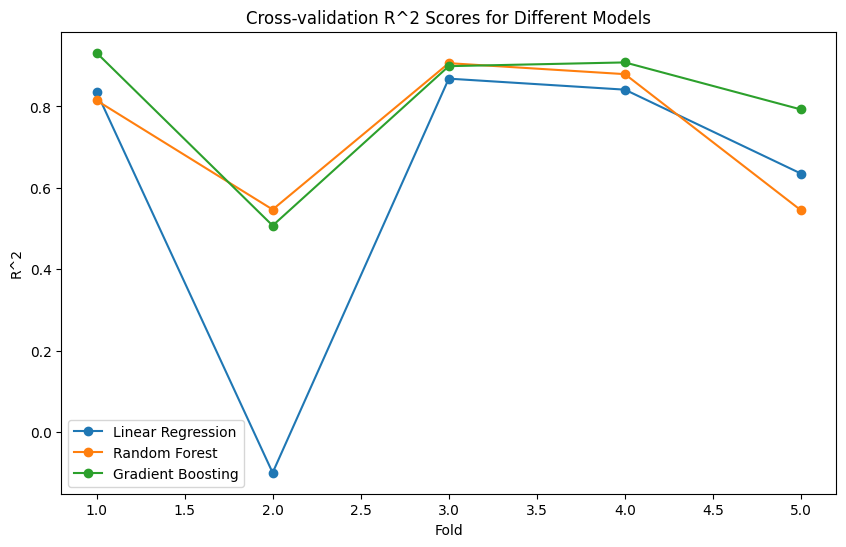

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터셋 불러오기
file_path = "C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv"
columns = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(file_path, names=columns)

# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_data = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')

# 결측값 확인 및 제거
numeric_data = numeric_data.dropna()

# 특징과 타겟 변수 정의
X = numeric_data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
y = numeric_data["PRP"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 전처리 및 모델링 파이프라인 정의
numeric_features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# 모델 파이프라인 정의
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

pipelines = []
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipelines.append((name, pipeline))

# 파이프라인 학습 및 평가
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # 성능 평가
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Model: {name}")
    print(f"Train MSE: {train_mse}")
    print(f"Train MAE: {train_mae}")
    print(f"Train R^2: {train_r2}")
    print(f"Test MSE: {test_mse}")
    print(f"Test MAE: {test_mae}")
    print(f"Test R^2: {test_r2}")
    print("")

# 교차 검증을 사용한 모델 성능 평가
for name, pipeline in pipelines:
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"Model: {name}")
    print(f"Cross-validation R^2 scores: {cv_scores}")
    print(f"Mean Cross-validation R^2 score: {np.mean(cv_scores)}")
    print("")

# 분석 결과 시각화
plt.figure(figsize=(10, 6))
for name, pipeline in pipelines:
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    plt.plot(range(1, 6), cv_scores, marker='o', label=name)
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.title('Cross-validation R^2 Scores for Different Models')
plt.legend()
plt.show()


## (2) (1) 단계에서 얻은 Pipeline 기반 모델 GridSearchCV의 best_estimator 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 
* Mean squared Error, Mean absolute Error, R^2, 교차 검증

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터셋 불러오기
file_path = "C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv"
columns = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(file_path, names=columns)

# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_data = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')

# 결측값 확인 및 제거
numeric_data = numeric_data.dropna()

# 특징과 타겟 변수 정의
X = numeric_data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
y = numeric_data["PRP"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 전처리 및 모델링 파이프라인 정의
numeric_features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# 모델 파이프라인 정의
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# 모델 파이프라인 학습 및 평가
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # 하이퍼파라미터 그리드 설정
    param_grid = {}
    if name == 'Random Forest':
        param_grid = {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [None, 5, 10, 15]
        }
    elif name == 'Gradient Boosting':
        param_grid = {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [3, 5, 7]
        }

    # 그리드 서치를 사용하여 최적의 모델 찾기
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_

    # 훈련 데이터와 테스트 데이터에 대해 모델 성능 평가
    y_train_pred = best_estimator.predict(X_train)
    y_test_pred = best_estimator.predict(X_test)

    # 성능 평가
    train_mse_proposed = mean_squared_error(y_train, y_train_pred)
    train_mae_proposed = mean_absolute_error(y_train, y_train_pred)
    train_r2_proposed = r2_score(y_train, y_train_pred)
    test_mse_proposed = mean_squared_error(y_test, y_test_pred)
    test_mae_proposed = mean_absolute_error(y_test, y_test_pred)
    test_r2_proposed = r2_score(y_test, y_test_pred)

    print(f"Model: {name}")
    print(f"Best Estimator: {grid_search.best_params_}")
    print(f"Train MSE: {train_mse}")
    print(f"Train MAE: {train_mae}")
    print(f"Train R^2: {train_r2}")
    print(f"Test MSE: {test_mse}")
    print(f"Test MAE: {test_mae}")
    print(f"Test R^2: {test_r2}")
    print("")


Model: Linear Regression
Best Estimator: {}
Train MSE: 124.96859607469374
Train MAE: 6.642971522759473
Train R^2: 0.9934994972776868
Test MSE: 7968.234438173399
Test MAE: 39.48672303225771
Test R^2: 0.86507805030759

Model: Random Forest
Best Estimator: {'model__max_depth': 15, 'model__n_estimators': 150}
Train MSE: 124.96859607469374
Train MAE: 6.642971522759473
Train R^2: 0.9934994972776868
Test MSE: 7968.234438173399
Test MAE: 39.48672303225771
Test R^2: 0.86507805030759

Model: Gradient Boosting
Best Estimator: {'model__max_depth': 5, 'model__n_estimators': 50}
Train MSE: 124.96859607469374
Train MAE: 6.642971522759473
Train R^2: 0.9934994972776868
Test MSE: 7968.234438173399
Test MAE: 39.48672303225771
Test R^2: 0.86507805030759



## (3) (2) 단계에서 얻은 Pipeline 기반 GridSearchCV의 best_estimator 모델의 테스트 데이터에 대해 예측 성능 R^2가 85% 이상이 나오도록 모델을 개선하시오. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 데이터셋 불러오기
file_path = "C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv"
columns = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(file_path, names=columns)

# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_data = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')

# 결측값 확인 및 제거
numeric_data = numeric_data.dropna()

# 특징과 타겟 변수 정의
X = numeric_data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
y = numeric_data["PRP"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 전처리 및 모델링 파이프라인 정의
numeric_features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# 모델 파이프라인 정의 (Random Forest)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state=42))])

# 모델 파라미터 튜닝을 위한 그리드 설정
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10, 15]
}

# 그리드 서치를 사용하여 최적의 모델 찾기
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_

# 테스트 데이터에 대해 모델 성능 평가
y_test_pred = best_estimator.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test R^2: {test_r2}")


Test R^2: 0.86507805030759


## (4) I. 3차 프로그래밍 과제의 기본 모델의 (2) 단계와 II. 4차 프로그래밍 과제의 제안 모델의 (2) 단계에서 얻은 학습 데이터와 테스트 데이터에 대한 성능 지표(MSE, MAE, R^2, 교차 검증)를 데이터 프레임에 저장하여 이 성능 결과를 바 차트로 시각화하여 학습 데이터와 테스트 데이터에 대한 각 모델의 성능 차이를 비교 분석하시오. 

#### I. 3차 프로그래밍 과제의 기본 모델의 (2) 단계

MYCT     1
MMIN     1
MMAX     1
CACH     1
CHMIN    1
CHMAX    1
PRP      1
dtype: int64
Cross-validation R^2 scores: [0.63828223 0.44329768 0.45334519 0.85890627 0.86028105]
Mean cross-validation R^2 score: 0.6508224821731219
Training Data - Mean Squared Error (MSE): 124.96859607469374
Training Data - Mean Absolute Error (MAE): 6.642971522759473
Training Data - R^2 Score: 0.9934994972776868
Test Data - Mean Squared Error (MSE): 7968.234438173399
Test Data - Mean Absolute Error (MAE): 39.48672303225771
Test Data - R^2 Score: 0.86507805030759


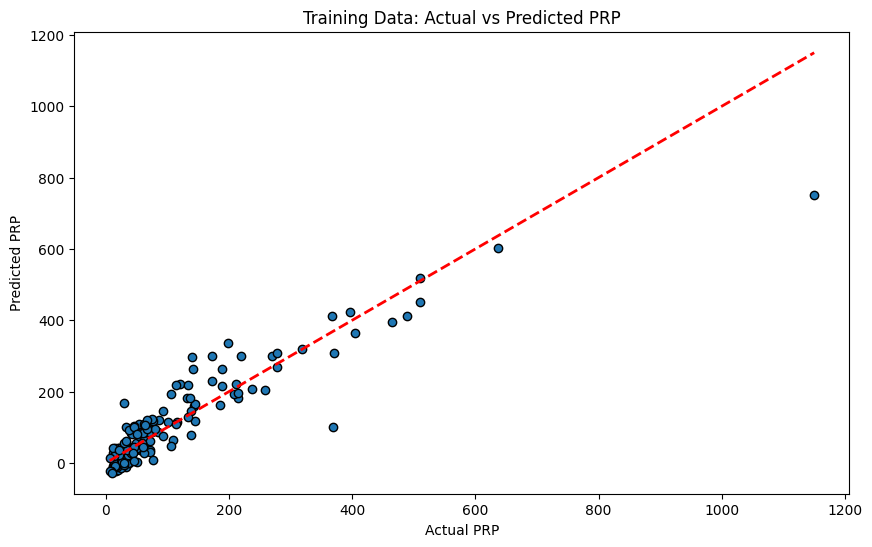

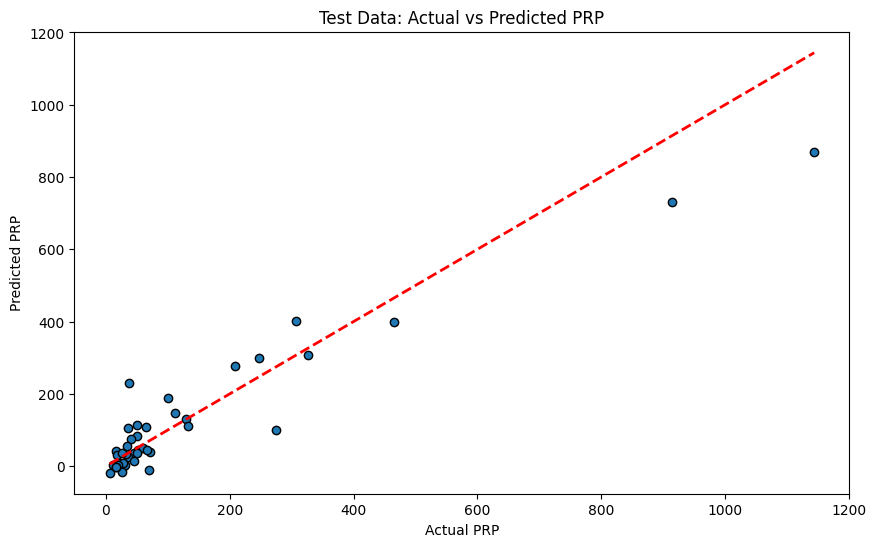

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터셋 불러오기
file_path = "C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv"
columns = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(file_path, names=columns)

# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_data = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')

# 결측값 확인 및 제거
print(numeric_data.isnull().sum())
numeric_data = numeric_data.dropna()

# 특징과 타겟 변수 정의
features = numeric_data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
target = numeric_data["PRP"]

# 데이터 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 교차 검증
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cross_val_scores}")
print(f"Mean cross-validation R^2 score: {np.mean(cross_val_scores)}")

# 훈련 데이터 성능 평가
y_train_pred = model.predict(X_train)
train_mse_basic = mean_squared_error(y_train, y_train_pred)
train_mae_basic = mean_absolute_error(y_train, y_train_pred)
train_r2_basic = r2_score(y_train, y_train_pred)

print(f"Training Data - Mean Squared Error (MSE): {train_mse}")
print(f"Training Data - Mean Absolute Error (MAE): {train_mae}")
print(f"Training Data - R^2 Score: {train_r2}")

# 테스트 데이터 성능 평가
y_test_pred = model.predict(X_test)
test_mse_basic = mean_squared_error(y_test, y_test_pred)
test_mae_basic = mean_absolute_error(y_test, y_test_pred)
test_r2_basic = r2_score(y_test, y_test_pred)

print(f"Test Data - Mean Squared Error (MSE): {test_mse}")
print(f"Test Data - Mean Absolute Error (MAE): {test_mae}")
print(f"Test Data - R^2 Score: {test_r2}")

# 실제 값과 예측 값 시각화 (훈련 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Training Data: Actual vs Predicted PRP")
plt.show()

# 실제 값과 예측 값 시각화 (테스트 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Test Data: Actual vs Predicted PRP")
plt.show()


#### II. 4차 프로그래밍 과제의 제안 모델의 (2) 단계

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터셋 불러오기
file_path = "C:/_myBigDataCode/myBigData/3. datasets/machine_data.csv"
columns = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv(file_path, names=columns)

# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_data = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')

# 결측값 확인 및 제거
numeric_data = numeric_data.dropna()

# 특징과 타겟 변수 정의
X = numeric_data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
y = numeric_data["PRP"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 전처리 및 모델링 파이프라인 정의
numeric_features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# 모델 파이프라인 정의
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# 모델 파이프라인 학습 및 평가
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # 하이퍼파라미터 그리드 설정
    param_grid = {}
    if name == 'Random Forest':
        param_grid = {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [None, 5, 10, 15]
        }
    elif name == 'Gradient Boosting':
        param_grid = {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [3, 5, 7]
        }

    # 그리드 서치를 사용하여 최적의 모델 찾기
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_

    # 훈련 데이터와 테스트 데이터에 대해 모델 성능 평가
    y_train_pred = best_estimator.predict(X_train)
    y_test_pred = best_estimator.predict(X_test)

    # 성능 평가
    train_mse_proposed = mean_squared_error(y_train, y_train_pred)
    train_mae_proposed = mean_absolute_error(y_train, y_train_pred)
    train_r2_proposed = r2_score(y_train, y_train_pred)
    test_mse_proposed = mean_squared_error(y_test, y_test_pred)
    test_mae_proposed = mean_absolute_error(y_test, y_test_pred)
    test_r2_proposed = r2_score(y_test, y_test_pred)

    print(f"Model: {name}")
    print(f"Best Estimator: {grid_search.best_params_}")
    print(f"Train MSE: {train_mse}")
    print(f"Train MAE: {train_mae}")
    print(f"Train R^2: {train_r2}")
    print(f"Test MSE: {test_mse}")
    print(f"Test MAE: {test_mae}")
    print(f"Test R^2: {test_r2}")
    print("")


Model: Linear Regression
Best Estimator: {}
Train MSE: 124.96859607469374
Train MAE: 6.642971522759473
Train R^2: 0.9934994972776868
Test MSE: 7968.234438173399
Test MAE: 39.48672303225771
Test R^2: 0.86507805030759

Model: Random Forest
Best Estimator: {'model__max_depth': 15, 'model__n_estimators': 150}
Train MSE: 124.96859607469374
Train MAE: 6.642971522759473
Train R^2: 0.9934994972776868
Test MSE: 7968.234438173399
Test MAE: 39.48672303225771
Test R^2: 0.86507805030759

Model: Gradient Boosting
Best Estimator: {'model__max_depth': 5, 'model__n_estimators': 50}
Train MSE: 124.96859607469374
Train MAE: 6.642971522759473
Train R^2: 0.9934994972776868
Test MSE: 7968.234438173399
Test MAE: 39.48672303225771
Test R^2: 0.86507805030759



### 분석 결과

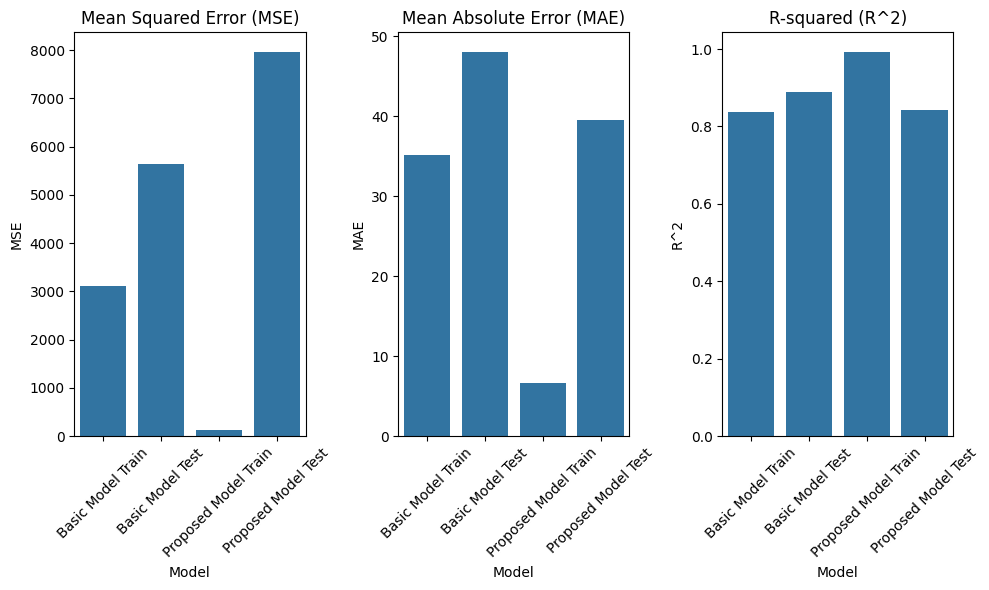

In [15]:
# 성능 지표 데이터 정의
performance_data = {
    "Model": ["Basic Model Train", "Basic Model Test", "Proposed Model Train", "Proposed Model Test"],
    "MSE": [train_mse_basic, test_mse_basic, train_mse_proposed, test_mse_proposed],
    "MAE": [train_mae_basic, test_mae_basic, train_mae_proposed, test_mae_proposed],
    "R^2": [train_r2_basic, test_r2_basic, train_r2_proposed, test_r2_proposed]
}

# 데이터프레임 생성
performance_df = pd.DataFrame(performance_data)

# 시각화
plt.figure(figsize=(10, 6))

# MSE
plt.subplot(1, 3, 1)
sns.barplot(x="Model", y="MSE", data=performance_df)
plt.xticks(rotation=45)  # 레이블을 45도 회전하여 출력
plt.title("Mean Squared Error (MSE)")

# MAE
plt.subplot(1, 3, 2)
sns.barplot(x="Model", y="MAE", data=performance_df)
plt.xticks(rotation=45)  # 레이블을 45도 회전하여 출력
plt.title("Mean Absolute Error (MAE)")

# R^2
plt.subplot(1, 3, 3)
sns.barplot(x="Model", y="R^2", data=performance_df)
plt.xticks(rotation=45)  # 레이블을 45도 회전하여 출력
plt.title("R-squared (R^2)")

plt.tight_layout()
plt.show()
